## Pregunta 7

## Sustentación

Para este ejercicio se utilizó el algoritmo de Bellman Ford por los siguientes motivos:
- El problema nos indica que hay factores climáticos a considerar. Lo cual podriamos tomar como valores los cuales se le sumaran al peso (en tiempo) inicial.
- Asimismo, nos piden considerar todos los factores posibles, por lo que el uso de un algoritmo dinamico es esencial.

In [ ]:
total_zonas = 6
distancias = [
    [0, 10, 15, 20, 25, 30],
    [10, 0, 35, 25, 30, 5],
    [15, 35, 0, 30, 5, 10],
    [20, 25, 30, 0, 10, 15],
    [25, 30, 5, 10, 0, 20],
    [30, 5, 10, 15, 20, 0]
]

condiciones_clima = [
    [0, 5, 10, 3, 8, 2],
    [5, 0, 4, 3, 6, 1],
    [10, 4, 0, 7, 3, 2],
    [3, 3, 7, 0, 4, 5],
    [8, 6, 3, 4, 0, 6],
    [2, 1, 2, 5, 6, 0]
]

inicio = 0
fin = 5

In [ ]:
tiempo_total_viaje = [[distancias[i][j] + condiciones_clima[i][j] for j in range(total_zonas)] for i in range(total_zonas)]

# Declarar el tiempo
tiempo_min = [float('inf')] * total_zonas
tiempo_min[inicio] = 0

zonas_previas = [-1] * total_zonas

for _ in range(total_zonas - 1):
    for i in range(total_zonas):
        for j in range(total_zonas):
            if i != j:
                travel_time = tiempo_total_viaje[i][j]
                if tiempo_min[i] != float('inf') and tiempo_min[i] + travel_time < tiempo_min[j]:
                    tiempo_min[j] = tiempo_min[i] + travel_time
                    zonas_previas[j] = i

# === CAMINO MINIMO (BELLMAN-FORD) ===
camino_minimo = []
zona_actual = fin
while zona_actual != -1:
    camino_minimo.insert(0, zona_actual)
    zona_actual = zonas_previas[zona_actual]

if tiempo_min[fin] == float('inf'):
    print(f"No hay una ruta desde la zona {inicio} a la zona {fin}")
else:
    print(f"La ruta más corta es: {camino_minimo}")
    print(f"El tiempo mínimo de viaje es: {tiempo_min[fin]} minutos")

La ruta más corta es: [0, 1, 5]
El tiempo mínimo de viaje es: 21 minutos


## Grafo resultante
En este apartado se hizo uso de la IA Gemini

In [ ]:
!pip install networkx matplotlib

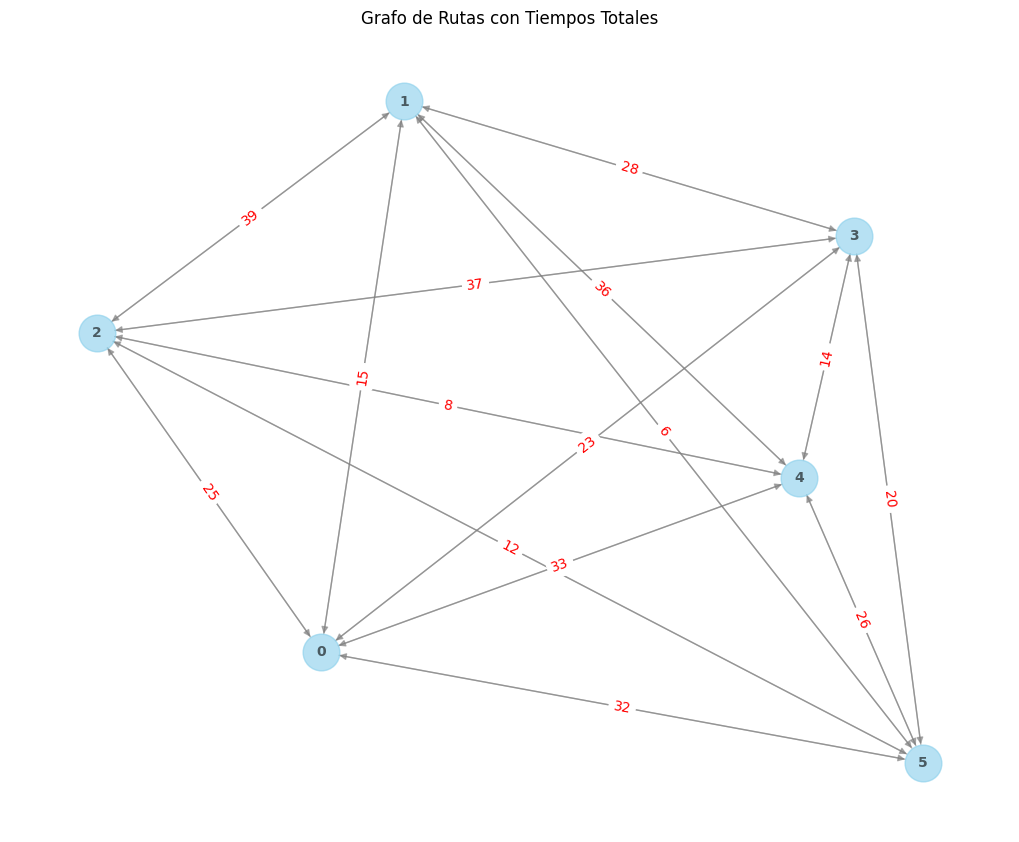

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Nodos
G.add_nodes_from(range(total_zonas))

# Aristas (con su peso modificado)
aristas = {}
for i in range(total_zonas):
    for j in range(total_zonas):
        if i != j:  # -> evitar bucles con uno mismo
            peso = tiempo_total_viaje[i][j]
            G.add_edge(i, j, weight=peso)
            aristas[(i, j)] = peso

# Dibujar el grafo
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=aristas, font_color='red')
plt.title("Grafo de Rutas con Tiempos Totales")
plt.show()